# A simple doc for the `laspec.mrs` module

How to install?
- for the latest stable version: `pip install -U laspec`
- for the latest github version: `pip install -U git+git://github.com/hypergravity/laspec`

The module structure:
1. `laspec.mrs.MrsSpec`: MRS spectrum class, e.g., a B band or R band spectrum
1. `laspec.mrs.MrsEpoch`: MRS epoch spectrum, e.g., B + R sepctrum
1. `laspec.mrs.MrsFits(astropy.io.fits.HDUList)`: MRS fits, e.g., read an MRS fits file
1. `laspec.mrs.MrsSource(numpy.ndarray)`: MRS source class, e.g., a source has multiple epoch spectra

**mrs** module structure|example
:-:|:-:
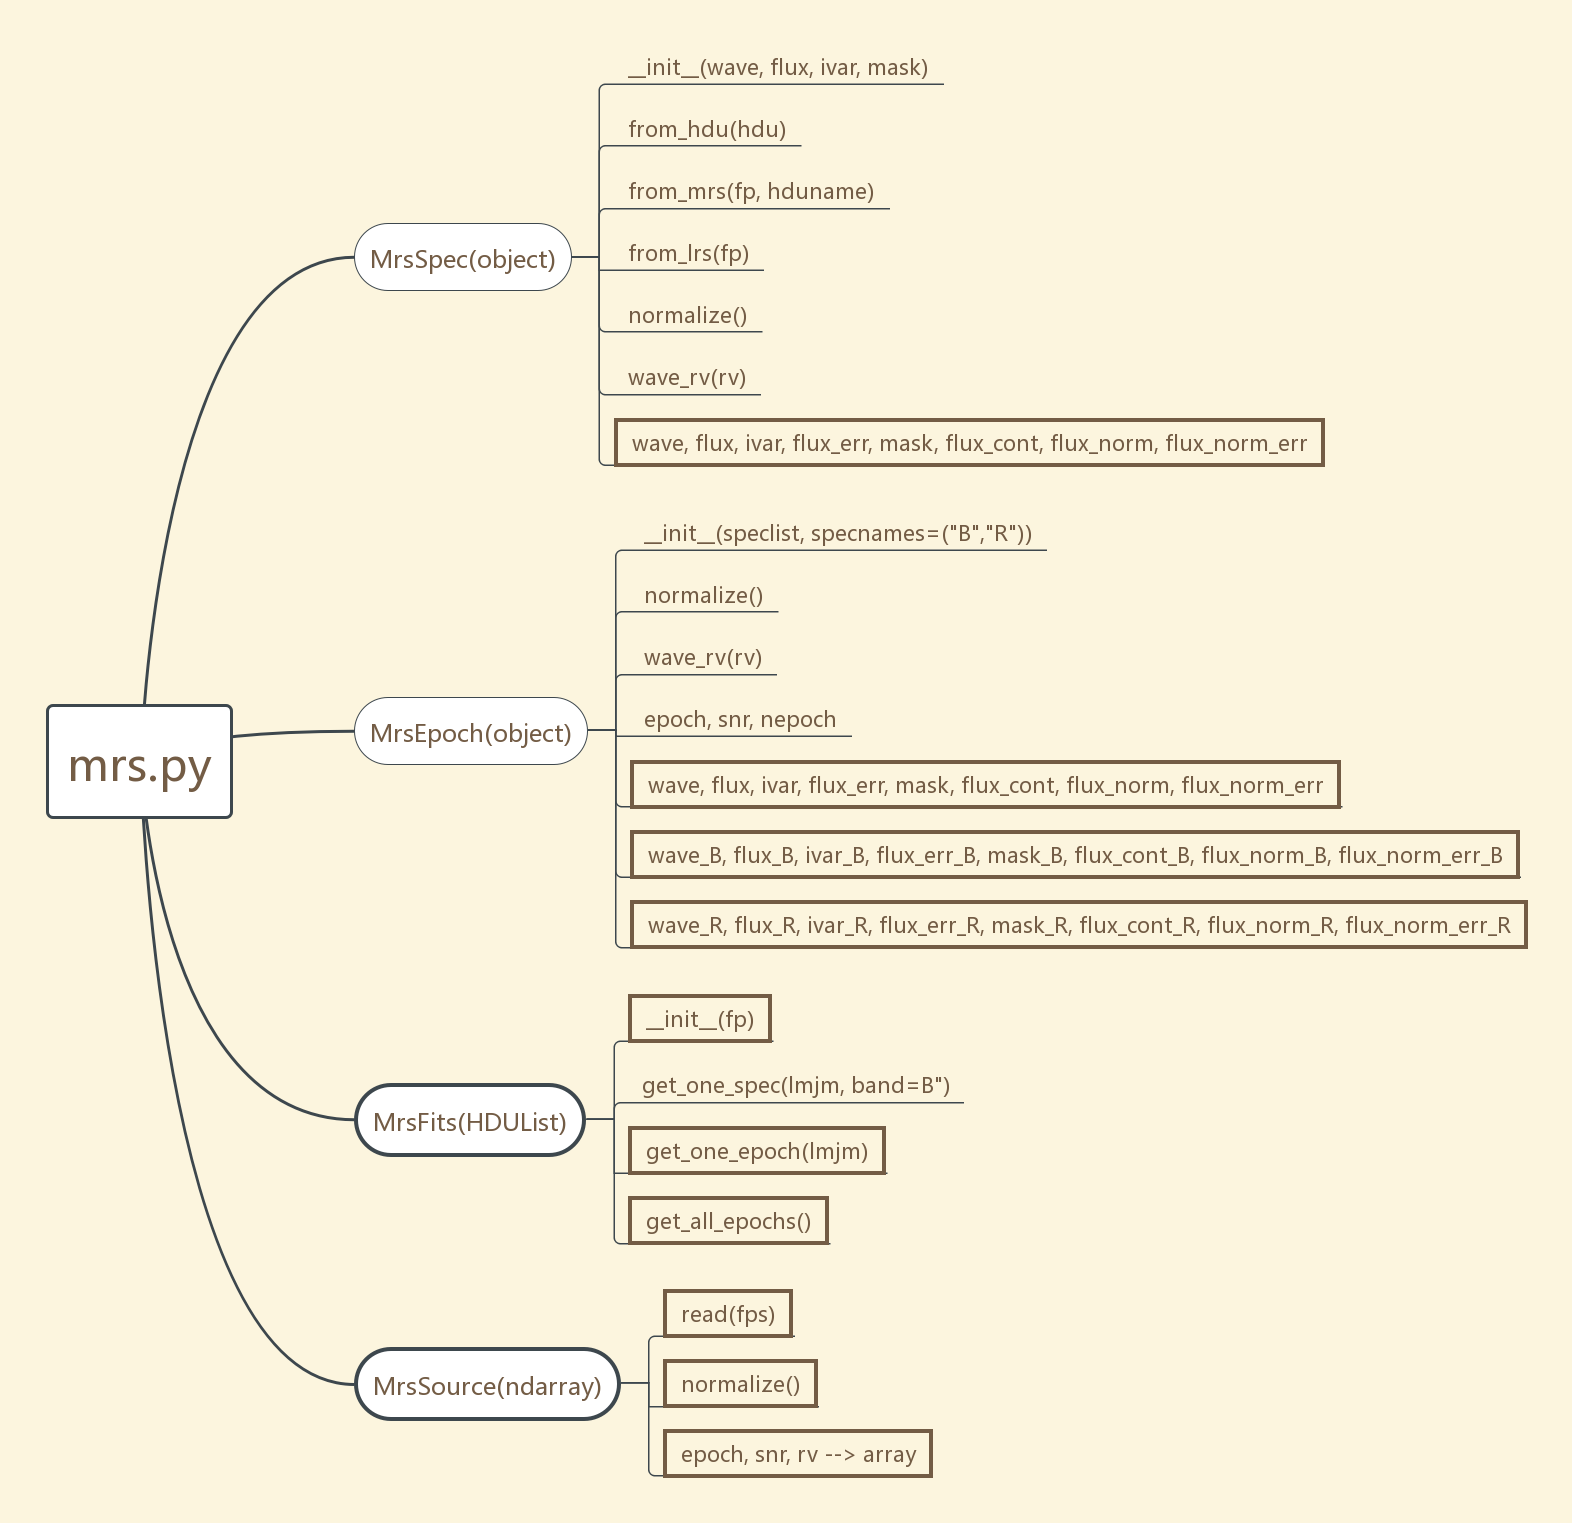|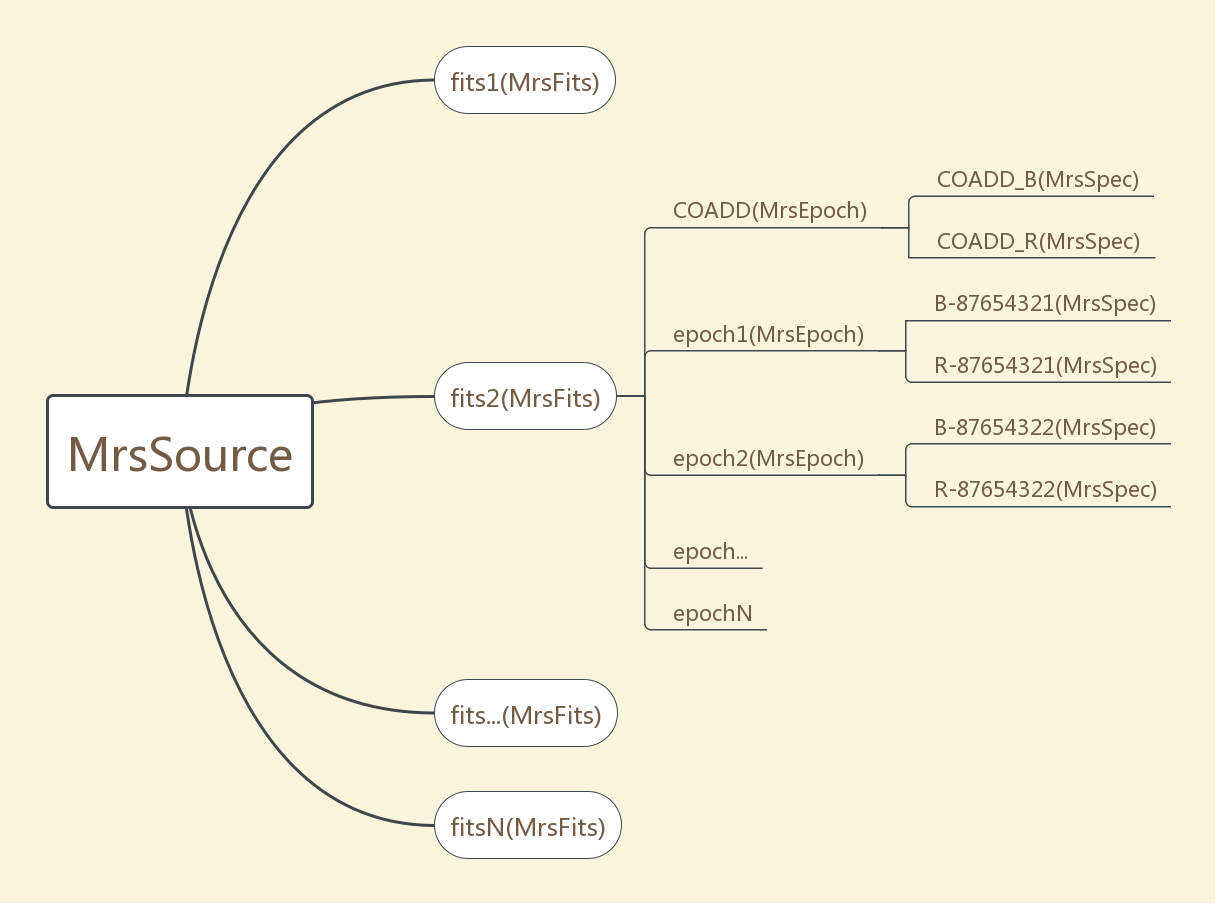

## 0. grab a set of test fits

In [1]:
%pylab inline
rcParams.update({"font.size":15})
import glob
import os
os.chdir("/Users/cham/PycharmProjects/laspec/laspec/data/")
fps = glob.glob("./KIC8098300/*/med*.fits.gz")
fps.sort()
fps

Populating the interactive namespace from numpy and matplotlib


['./KIC8098300/DR6_medium/med-58268-HIP95119KP01_sp12-076.fits.gz',
 './KIC8098300/DR6_medium/med-58269-HIP95119KP01_sp12-076.fits.gz',
 './KIC8098300/DR6_medium/med-58270-HIP95119KP01_sp12-076.fits.gz',
 './KIC8098300/DR7_medium/med-58625-TD192102N424113K01_sp12-076.fits.gz',
 './KIC8098300/DR7_medium/med-58644-TD192102N424113K01_sp12-076.fits.gz',
 './KIC8098300/DR7_medium/med-58646-TD192102N424113K01_sp12-076.fits.gz',
 './KIC8098300/DR7_medium/med-58649-TD193637N444141K01_sp10-159.fits.gz']

## 1/4 `laspec.mrs.MrsSpec`

In [2]:
# open fits
from astropy.io import fits
hdulist = fits.open(fps[3])
hdulist.info()

Filename: ./KIC8098300/DR7_medium/med-58625-TD192102N424113K01_sp12-076.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     31   4156R x 5C   [E, E, E, I, I]   
  2  COADD_R       1 BinTableHDU     31   3800R x 5C   [E, E, E, I, I]   
  3  B-84420148    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  4  B-84420171    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  5  B-84420195    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  6  R-84420148    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  7  R-84420171    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  8  R-84420195    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   


<MrsSpec name=B-84420171 snr=16.0>
B-84420171
84420171
16
1200
{'p': 1e-06, 'q': 0.5, 'binwidth': 100.0, 'lu': (-2, 3), 'niter': 3}
[4898.0415 4898.171  4898.297  ... 5388.983  5389.09   5389.1934] [250.91136 514.41    402.4528  ... 404.27078 519.9978  591.60596]


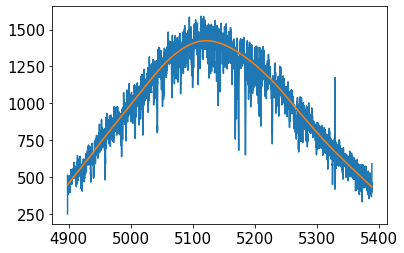

In [3]:
from laspec import mrs

# initiate a MrsSpec from an HDU
ms = mrs.MrsSpec.from_hdu(hdulist[4])

# the attributes
print(ms)  
print(ms.name)
print(ms.lmjm)
print(ms.snr)
print(ms.exptime)
print(ms.norm_kwargs)
print(ms.wave, ms.flux)

# normalize spectrum
ms.normalize() 

# plot
plot(ms.wave, ms.flux)
plot(ms.wave, ms.flux_cont)

## 2/4 `laspec.mrs.MrsEpoch`

In [4]:
msB = mrs.MrsSpec.from_hdu(hdulist[4])
msR = mrs.MrsSpec.from_hdu(hdulist[7])
print(msB, msR)

<MrsSpec name=B-84420171 snr=16.0> <MrsSpec name=R-84420171 snr=28.0>


In [5]:
# initiate an MrsEpoch
me = mrs.MrsEpoch([msB, msR])
print(me)

[MrsEpoch epoch=-1 nspec=2]
<MrsSpec name=B-84420171 snr=16.0>
<MrsSpec name=R-84420171 snr=28.0>


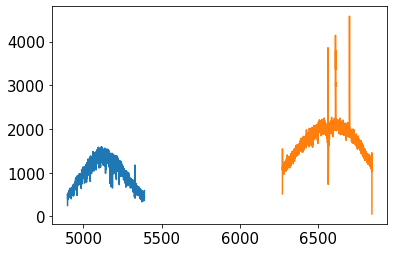

In [6]:
# access to wavelength and flux
plot(me.wave_B, me.flux_B)
plot(me.wave_R, me.flux_R)

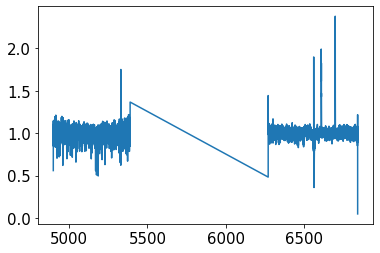

In [7]:
# access to combined wavelength and flux
plot(me.wave, me.flux_norm)

## 3/4 `laspec.mrs.MrsFits`

In [8]:
# initiate and MrsFits from a file path fps[3]
mf = mrs.MrsFits(fps[3]) 
mf

No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     31   4156R x 5C   [E, E, E, I, I]   
  2  COADD_R       1 BinTableHDU     31   3800R x 5C   [E, E, E, I, I]   
  3  B-84420148    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  4  B-84420171    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  5  B-84420195    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  6  R-84420148    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  7  R-84420171    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   
  8  R-84420195    1 BinTableHDU     30   4136R x 4C   [E, E, E, I]   

<MrsSpec name=B-84420195 snr=3.0>


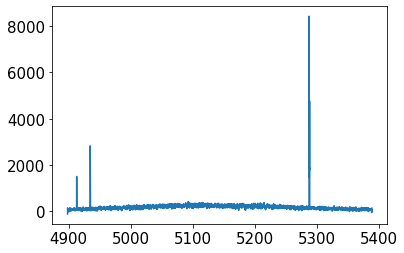

In [9]:
# get an spectrum via (lmjm, band)
ms = mf.get_one_spec(lmjm=84420195, band="B")
print(ms)
plot(ms.wave, ms.flux)

In [10]:
# get and epoch (B+R)
me = mf.get_one_epoch(lmjm=84420195)
me

[MrsEpoch epoch=84420195 nspec=2]
<MrsSpec name=B-84420195 snr=3.0>
<MrsSpec name=R-84420195 snr=4.0>

In [11]:
# get all epochs
mes = mf.get_all_epochs()
mes

[[MrsEpoch epoch=84420148 nspec=2]
 <MrsSpec name=B-84420148 snr=12.0>
 <MrsSpec name=R-84420148 snr=23.0>,
 [MrsEpoch epoch=84420171 nspec=2]
 <MrsSpec name=B-84420171 snr=16.0>
 <MrsSpec name=R-84420171 snr=28.0>,
 [MrsEpoch epoch=84420195 nspec=2]
 <MrsSpec name=B-84420195 snr=3.0>
 <MrsSpec name=R-84420195 snr=4.0>]

In [12]:
mrs.MrsSpec.from_hdu(mf[3])

<MrsSpec name=B-84420148 snr=12.0>

## 4/4 `laspec.mrs.MrsSource`

In [13]:
# initiate MrsSource from a list of file paths fps
msrc = mrs.MrsSource.read(fps, normalize=True)
print(msrc)

[[MrsEpoch epoch=83906016 nspec=2]
<MrsSpec name=B-83906016 snr=0.0>
<MrsSpec name=R-83906016 snr=0.0>
 [MrsEpoch epoch=83906030 nspec=2]
<MrsSpec name=B-83906030 snr=0.0>
<MrsSpec name=R-83906030 snr=0.0>
 [MrsEpoch epoch=83906043 nspec=2]
<MrsSpec name=B-83906043 snr=0.0>
<MrsSpec name=R-83906043 snr=0.0>
 [MrsEpoch epoch=83906056 nspec=2]
<MrsSpec name=B-83906056 snr=0.0>
<MrsSpec name=R-83906056 snr=0.0>
 [MrsEpoch epoch=83906070 nspec=2]
<MrsSpec name=B-83906070 snr=0.0>
<MrsSpec name=R-83906070 snr=0.0>
 [MrsEpoch epoch=83906084 nspec=2]
<MrsSpec name=B-83906084 snr=0.0>
<MrsSpec name=R-83906084 snr=0.0>
 [MrsEpoch epoch=83906097 nspec=2]
<MrsSpec name=B-83906097 snr=0.0>
<MrsSpec name=R-83906097 snr=0.0>
 [MrsEpoch epoch=83906114 nspec=2]
<MrsSpec name=B-83906114 snr=0.0>
<MrsSpec name=R-83906114 snr=0.0>
 [MrsEpoch epoch=83906128 nspec=2]
<MrsSpec name=B-83906128 snr=0.0>
<MrsSpec name=R-83906128 snr=0.0>
 [MrsEpoch epoch=83907478 nspec=2]
<MrsSpec name=B-83907478 snr=0.0>
<Mrs

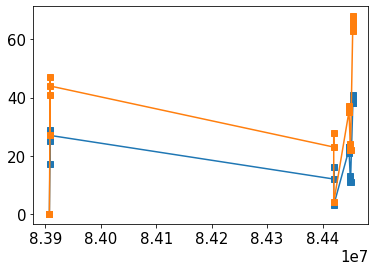

In [14]:
# access to snr and epoch
plot(msrc.epoch, msrc.snr, "s-")

In [15]:
# select a subsect of epochs
msrc20 = msrc[msrc.snr[:,0]>20]
msrc20

MrsSource([[MrsEpoch epoch=83908922 nspec=2]
<MrsSpec name=B-83908922 snr=25.0>
<MrsSpec name=R-83908922 snr=41.0>,
           [MrsEpoch epoch=83908945 nspec=2]
<MrsSpec name=B-83908945 snr=29.0>
<MrsSpec name=R-83908945 snr=47.0>,
           [MrsEpoch epoch=83908992 nspec=2]
<MrsSpec name=B-83908992 snr=27.0>
<MrsSpec name=R-83908992 snr=44.0>,
           [MrsEpoch epoch=84447441 nspec=2]
<MrsSpec name=B-84447441 snr=22.0>
<MrsSpec name=R-84447441 snr=35.0>,
           [MrsEpoch epoch=84447465 nspec=2]
<MrsSpec name=B-84447465 snr=23.0>
<MrsSpec name=R-84447465 snr=37.0>,
           [MrsEpoch epoch=84447488 nspec=2]
<MrsSpec name=B-84447488 snr=21.0>
<MrsSpec name=R-84447488 snr=35.0>,
           [MrsEpoch epoch=84447511 nspec=2]
<MrsSpec name=B-84447511 snr=23.0>
<MrsSpec name=R-84447511 snr=36.0>,
           [MrsEpoch epoch=84454650 nspec=2]
<MrsSpec name=B-84454650 snr=38.0>
<MrsSpec name=R-84454650 snr=66.0>,
           [MrsEpoch epoch=84454696 nspec=2]
<MrsSpec name=B-84454696 sn

(4880, 6900)

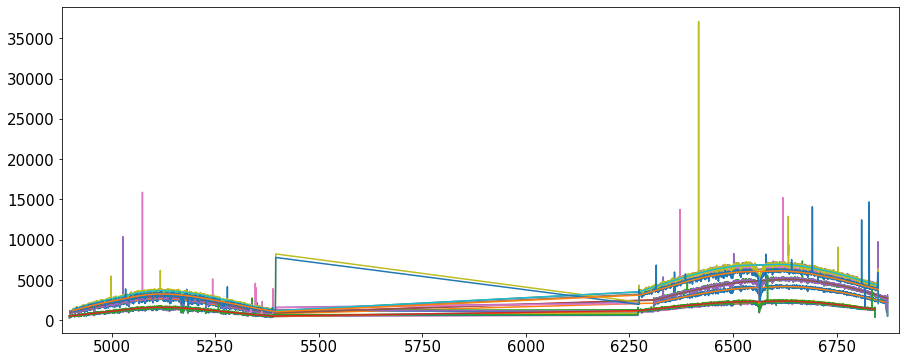

In [16]:
# plot all epochs (original flux and continuum flux)
figure(figsize=(15,6))
for i, ms in enumerate(msrc20):
    plot(ms.wave, ms.flux)
    plot(ms.wave, ms.flux_cont)
xlim(4880,6900)

Text(0, 0.5, 'Normalized Flux + const.')

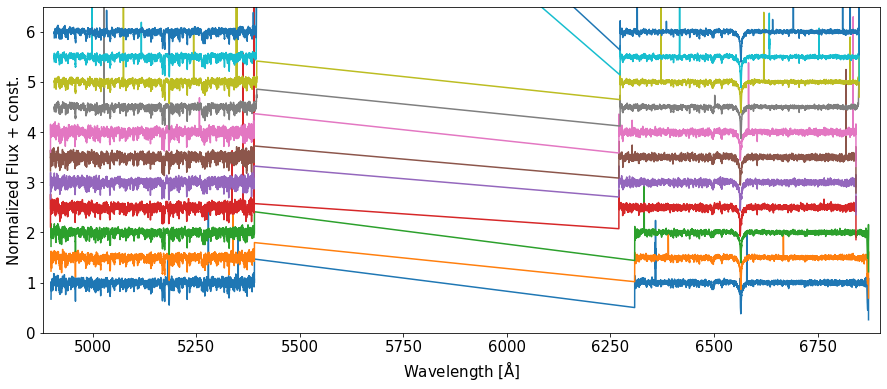

In [17]:
# plot all epochs (normalized flux)
figure(figsize=(15,6))
for i, ms in enumerate(msrc20):
    plot(ms.wave, ms.flux_norm+i*0.5)
ylim(0, 6.5)
xlim(4880,6900)
xlabel("Wavelength [$\\rm \\AA$]")
ylabel("Normalized Flux + const.")

Text(0, 0.5, 'Normalized Flux + const.')

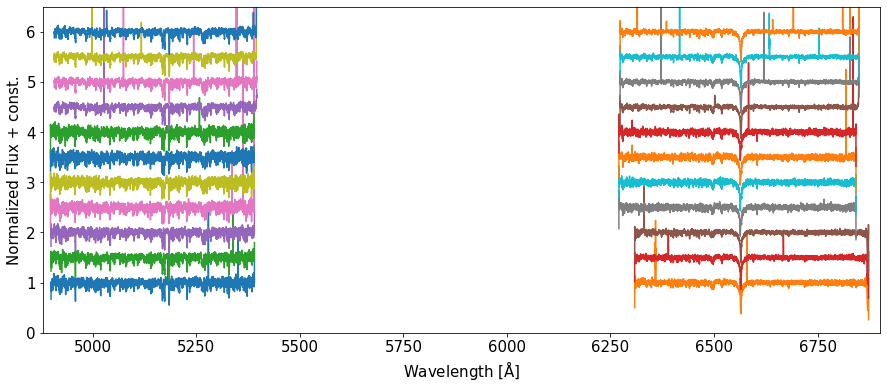

In [18]:
# plot all epochs (normalized flux) without strides
figure(figsize=(15,6))
for i, ms in enumerate(msrc20):
    plot(ms.wave_B, ms.flux_norm_B+i*0.5)
    plot(ms.wave_R, ms.flux_norm_R+i*0.5)
ylim(0, 6.5)
xlim(4880,6900)
xlabel("Wavelength [$\\rm \\AA$]")
ylabel("Normalized Flux + const.")

(4900, 6900)

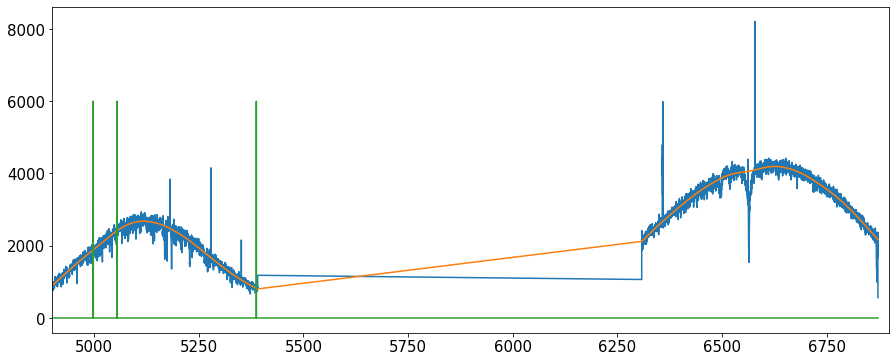

In [19]:
# check mask
figure(figsize=(15,6))
plot(msrc20[0].wave, msrc20[0].flux)
plot(msrc20[0].wave, msrc20[0].flux_cont)
plot(msrc20[0].wave, (msrc20[0].mask>0)*6000)
xlim(4900, 6900)

In [20]:
# renormalize using a different settting
print("default setting is: ", ms.norm_kwargs)
msrc20.normalize(niter=5)

default setting is:  {'p': 1e-06, 'q': 0.5, 'binwidth': 100, 'lu': (-2, 3), 'niter': 3}
